# Creating a realistic recording site from a rat cortex column

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pprint
np.set_printoptions(suppress=True)
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from scipy import stats
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle
import math
from scipy.spatial.distance import squareform, pdist
from scipy.spatial import cKDTree
import pandas as pd
from collections import namedtuple

Channel = namedtuple("Channel", ["id", "pos", "type"])
Neuron = namedtuple("Neuron", ["id", "pos", "type", "layer"])
Layer = namedtuple("Layer", ["id", "name", "height", "volume", "total_count", "total_density", "in_ratio", 
                             "layer_density_distributions"])

## 1.  Building and visualizing a rat Somatosensory cortex column object

In [2]:
from CortexColumn import Column, createRatSomatosensoryCortexDataDict

#Random seed for reproducibility
np.random.seed(0)

#Import rat somatosensory cortex column dict from the Helmstaedter papers
rat_somatosensory_cortex_data_dict = createRatSomatosensoryCortexDataDict()

#Create new column using the given cortex dict and with min distance (microns) enforced between neurons
column = Column(rat_somatosensory_cortex_data_dict, min_neuron_dist=3)

In [3]:
#Layer information is stored in a layer DataFrame

print(column.getLayers())

   id region      height    volume  total_count  total_density   in_ratio  \
0   0     L1  112.351160  0.014363    55.578350       7.018358  75.866035   
1   1     L2  218.058757  0.025283  1931.497070     111.821252  16.165011   
2   2     L3  406.067978  0.035968  5087.141561      92.146623  10.353320   
3   3     L4  293.340878  0.036720  4584.436721     124.188279   7.948849   
4   4    L5A  248.005502  0.034053  1522.621969      53.632546  11.778734   
5   5    L5B  273.848643  0.037334  2320.579184      65.624561  16.528333   
6   6    L6A  281.431720  0.041444  3895.807924      92.640346   9.982142   
7   7    L6B  200.201415  0.025243   631.991731      47.583563   8.167604   

                         layer_density_distributions  
0  <scipy.stats._distn_infrastructure.rv_sample o...  
1  <scipy.stats._distn_infrastructure.rv_sample o...  
2  <scipy.stats._distn_infrastructure.rv_sample o...  
3  <scipy.stats._distn_infrastructure.rv_sample o...  
4  <scipy.stats._distn_infrastr

In [4]:
#Neuron information is stored in a neuron DataFrame

print(column.getNeurons())

          id                                               pos type layer
0          0    [55.8631277681, -30.9479258753, 27.6879637593]   IN    L1
1          1     [-165.19542964, -92.545074807, 44.3807072531]   IN    L1
2          2     [-65.4062348953, 159.47530662, 57.0751888323]   IN    L1
3          3    [-13.9144601319, 16.8244137039, 31.5862691261]   IN    L1
4          4    [-13.7338662558, 163.687391108, 93.4593722561]   IN    L1
5          5    [91.1088084401, -27.8727656575, 80.3650644854]   IN    L1
6          6    [-121.878733572, -155.083274576, 49.778360838]   IN    L1
7          7     [-59.153474407, -56.591973505, 76.4667591186]   IN    L1
8          8     [137.205331847, 48.7532346459, 66.5710608797]   IN    L1
9          9   [-139.493205858, -68.0675907081, 61.6731900342]   IN    L1
10        10   [-87.3520516467, -125.460104406, 42.7814024873]   IN    L1
11        11     [29.3122020548, 177.308162713, 90.1608061764]   IN    L1
12        12   [-103.062679018, -81.39

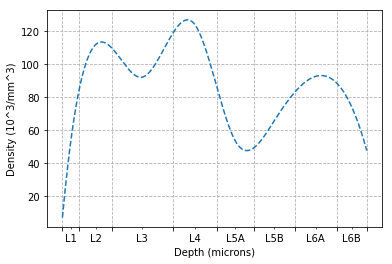

In [5]:
#Plot the density vs. depth distribution from which neurons were sampled

column.plotDensityDistribution()

Layer: L2
Radius: 192.111592354
Height: 218.058757183
Total Neurons: 1931
IN Neurons: 312
EX Neurons: 1619


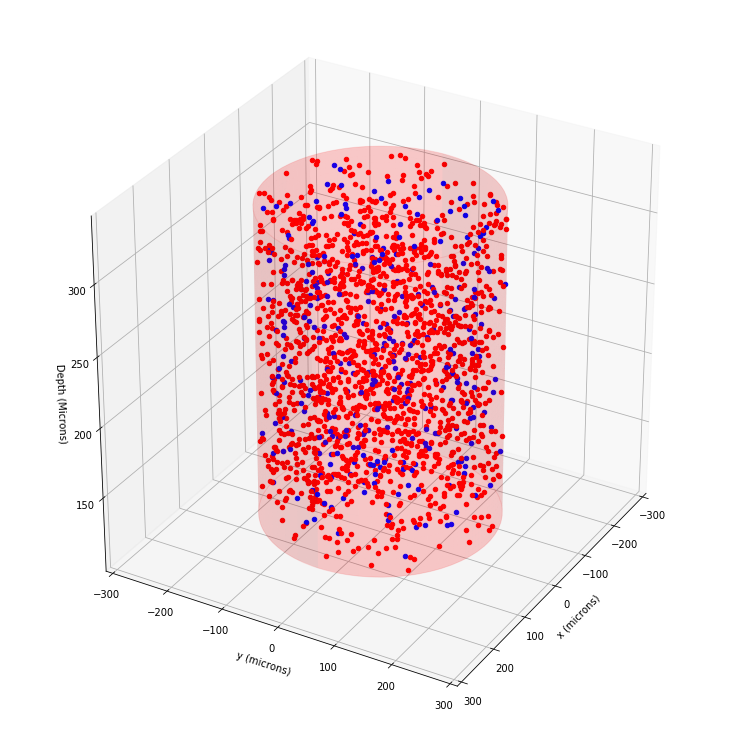

In [6]:
#Plot a layer from the cortex column
layer_id = 1
fig= plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotLayer(layer_id, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


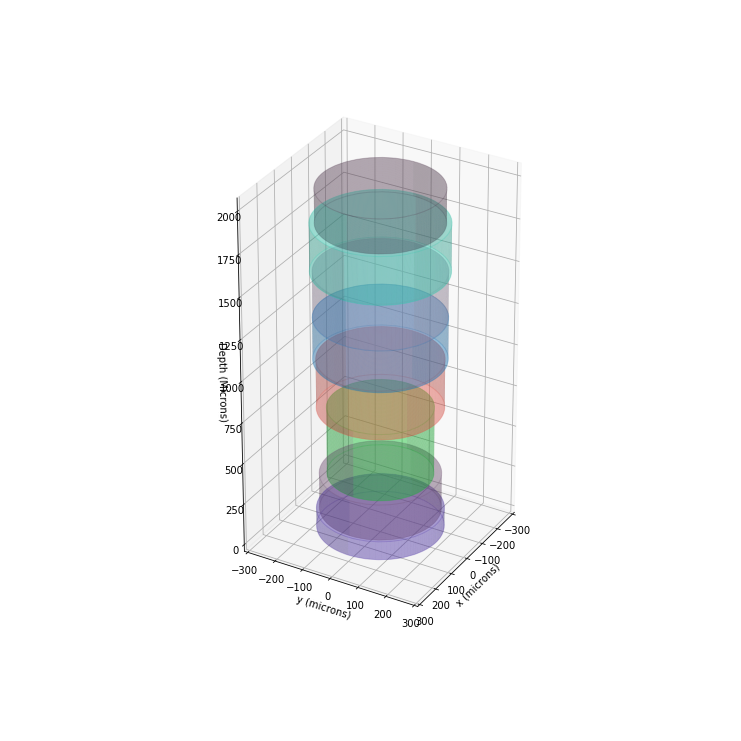

In [7]:
#Plot the entire column without any neurons to see the layer shapes
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]
Total Neurons: {'L6B': 632, 'L5B': 2321, 'L5A': 1523, 'L4': 4584, 'L2': 1931, 'L3': 5087, 'L1': 56, 'L6A': 3896}
IN Neurons: {'L6B': 52, 'L5B': 384, 'L5A': 179, 'L4': 364, 'L2': 312, 'L3': 527, 'L1': 42, 'L6A': 389}
EX Neurons: {'L6B': 580, 'L5B': 1937, 'L5A': 1344, 'L4': 4220, 'L2': 1619, 'L3': 4560, 'L1': 14, 'L6A': 3507}


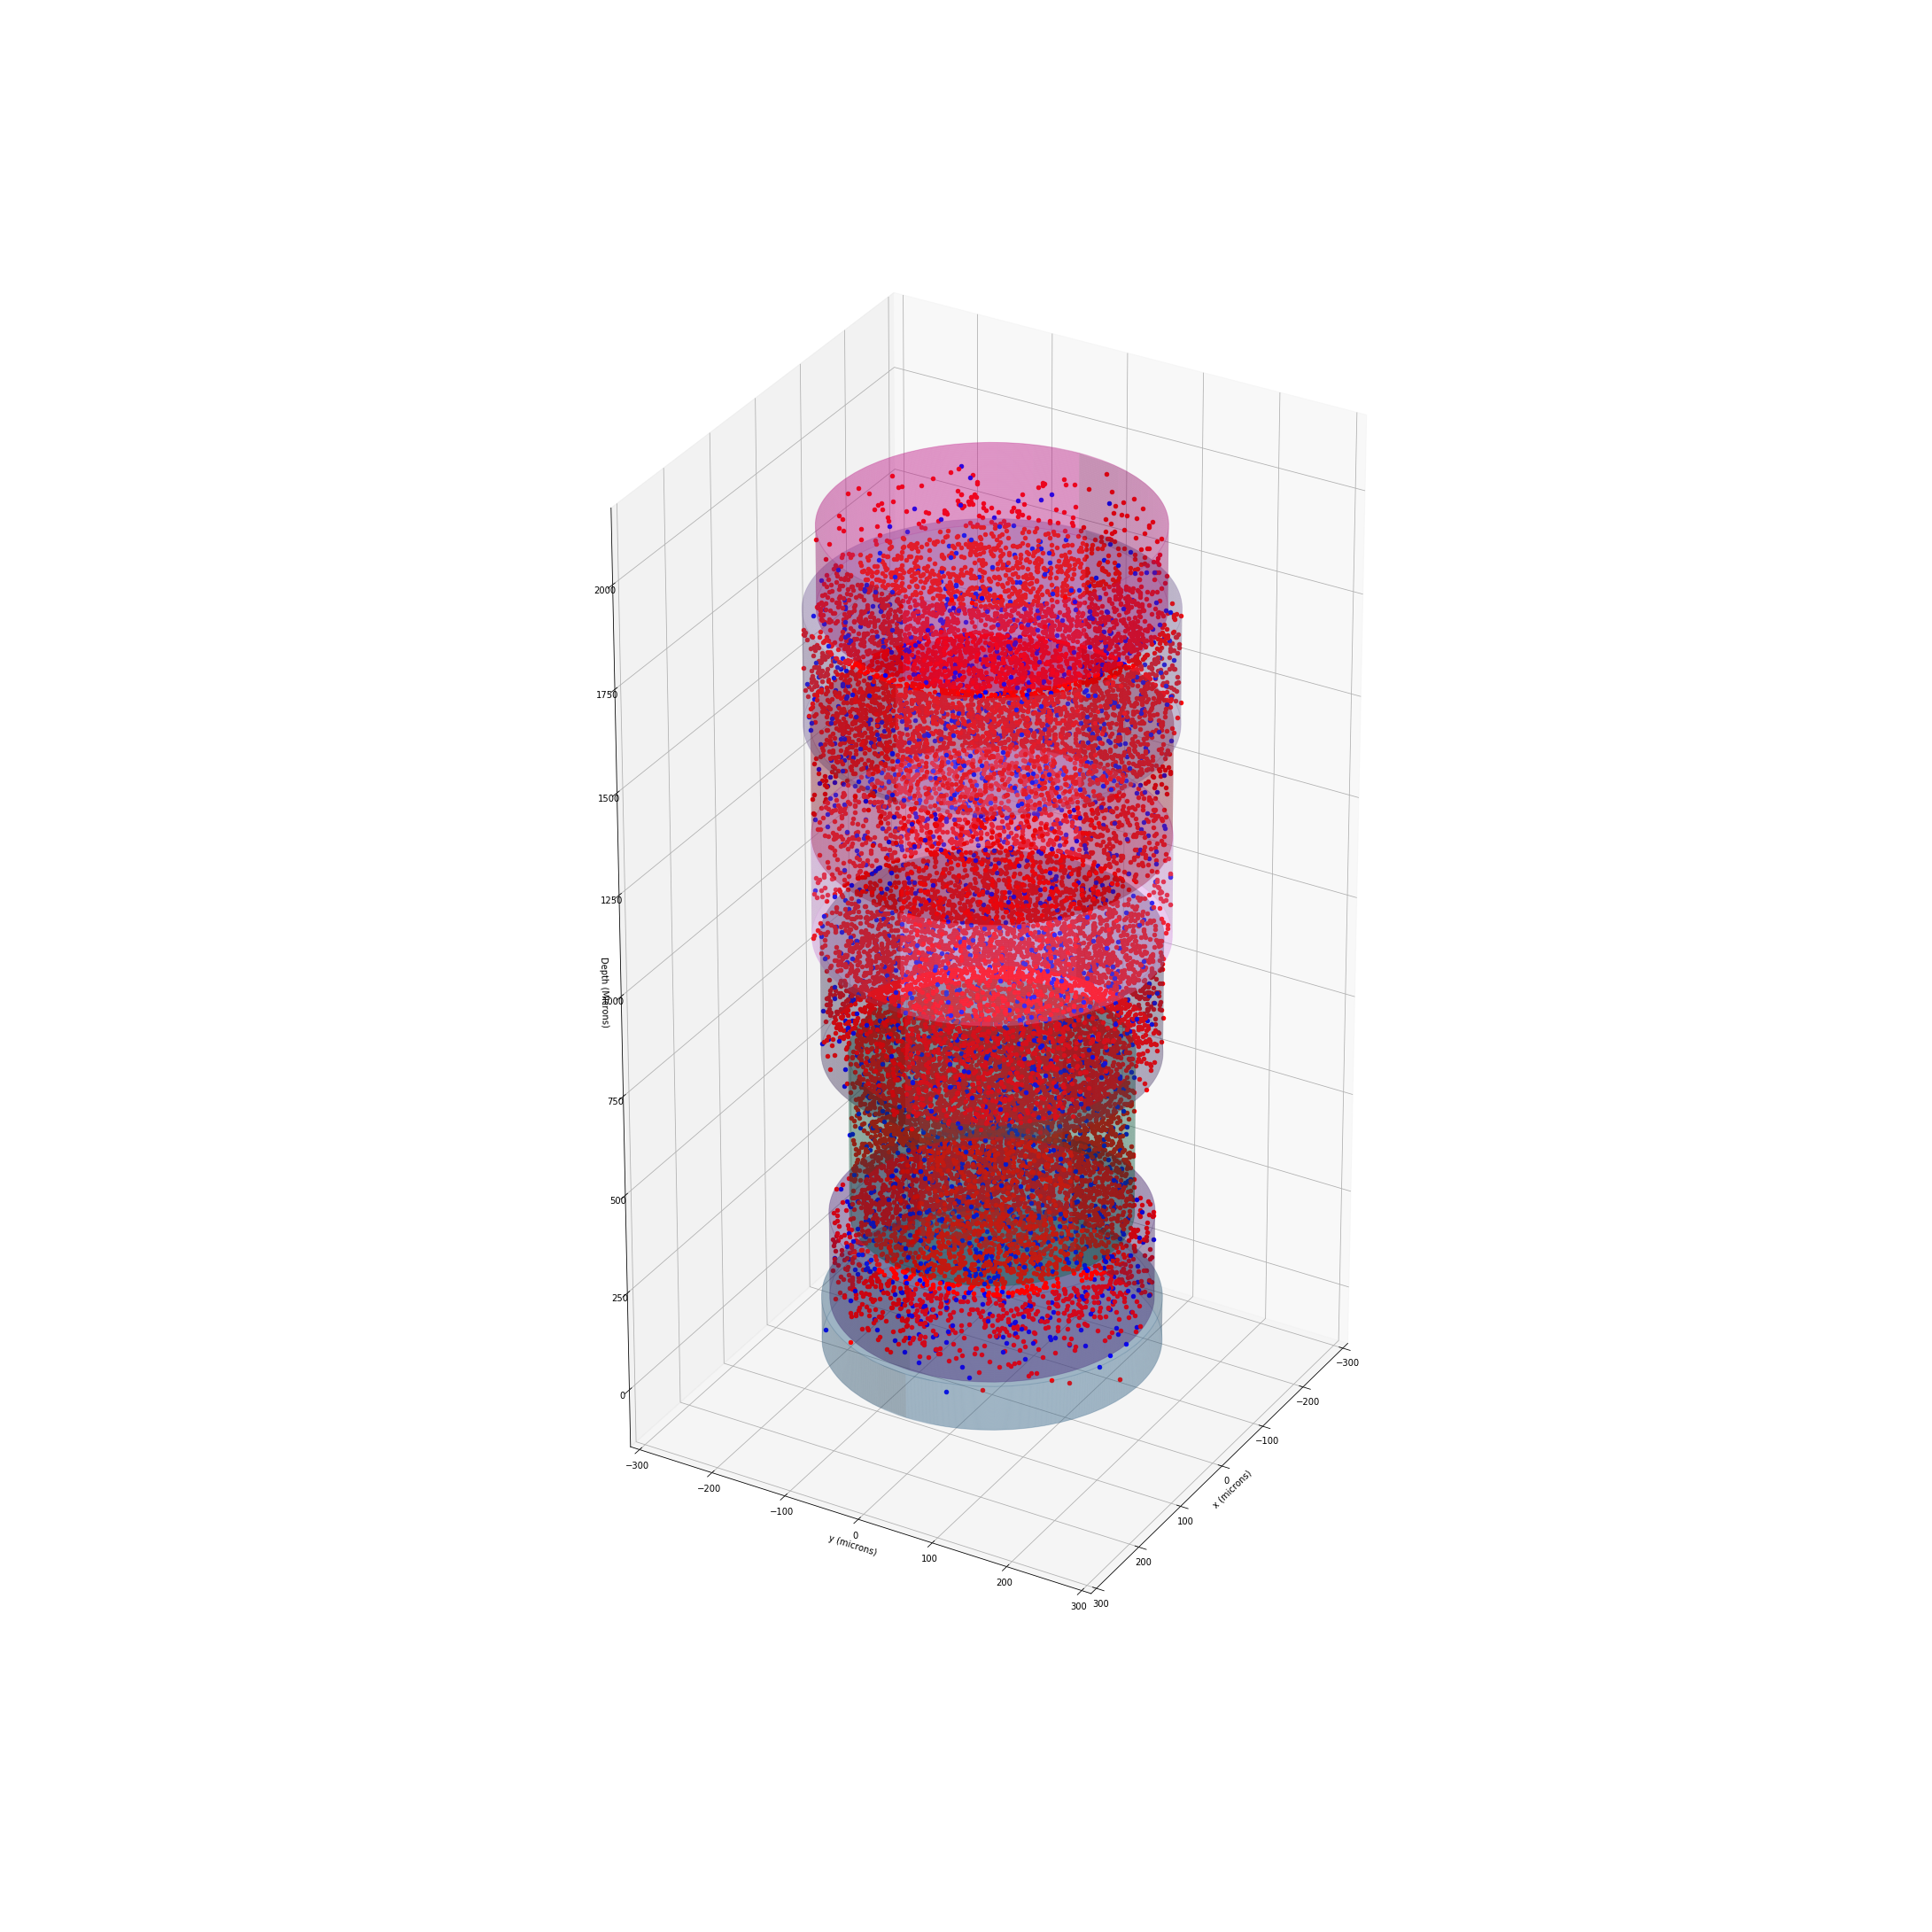

In [8]:
#Can plot the entire column with all neurons included (pretty slow, lots of neurons to be scattered)
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=True, ax=ax)

## 2. Creating and using a Probe object (Neuropixels subclass)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


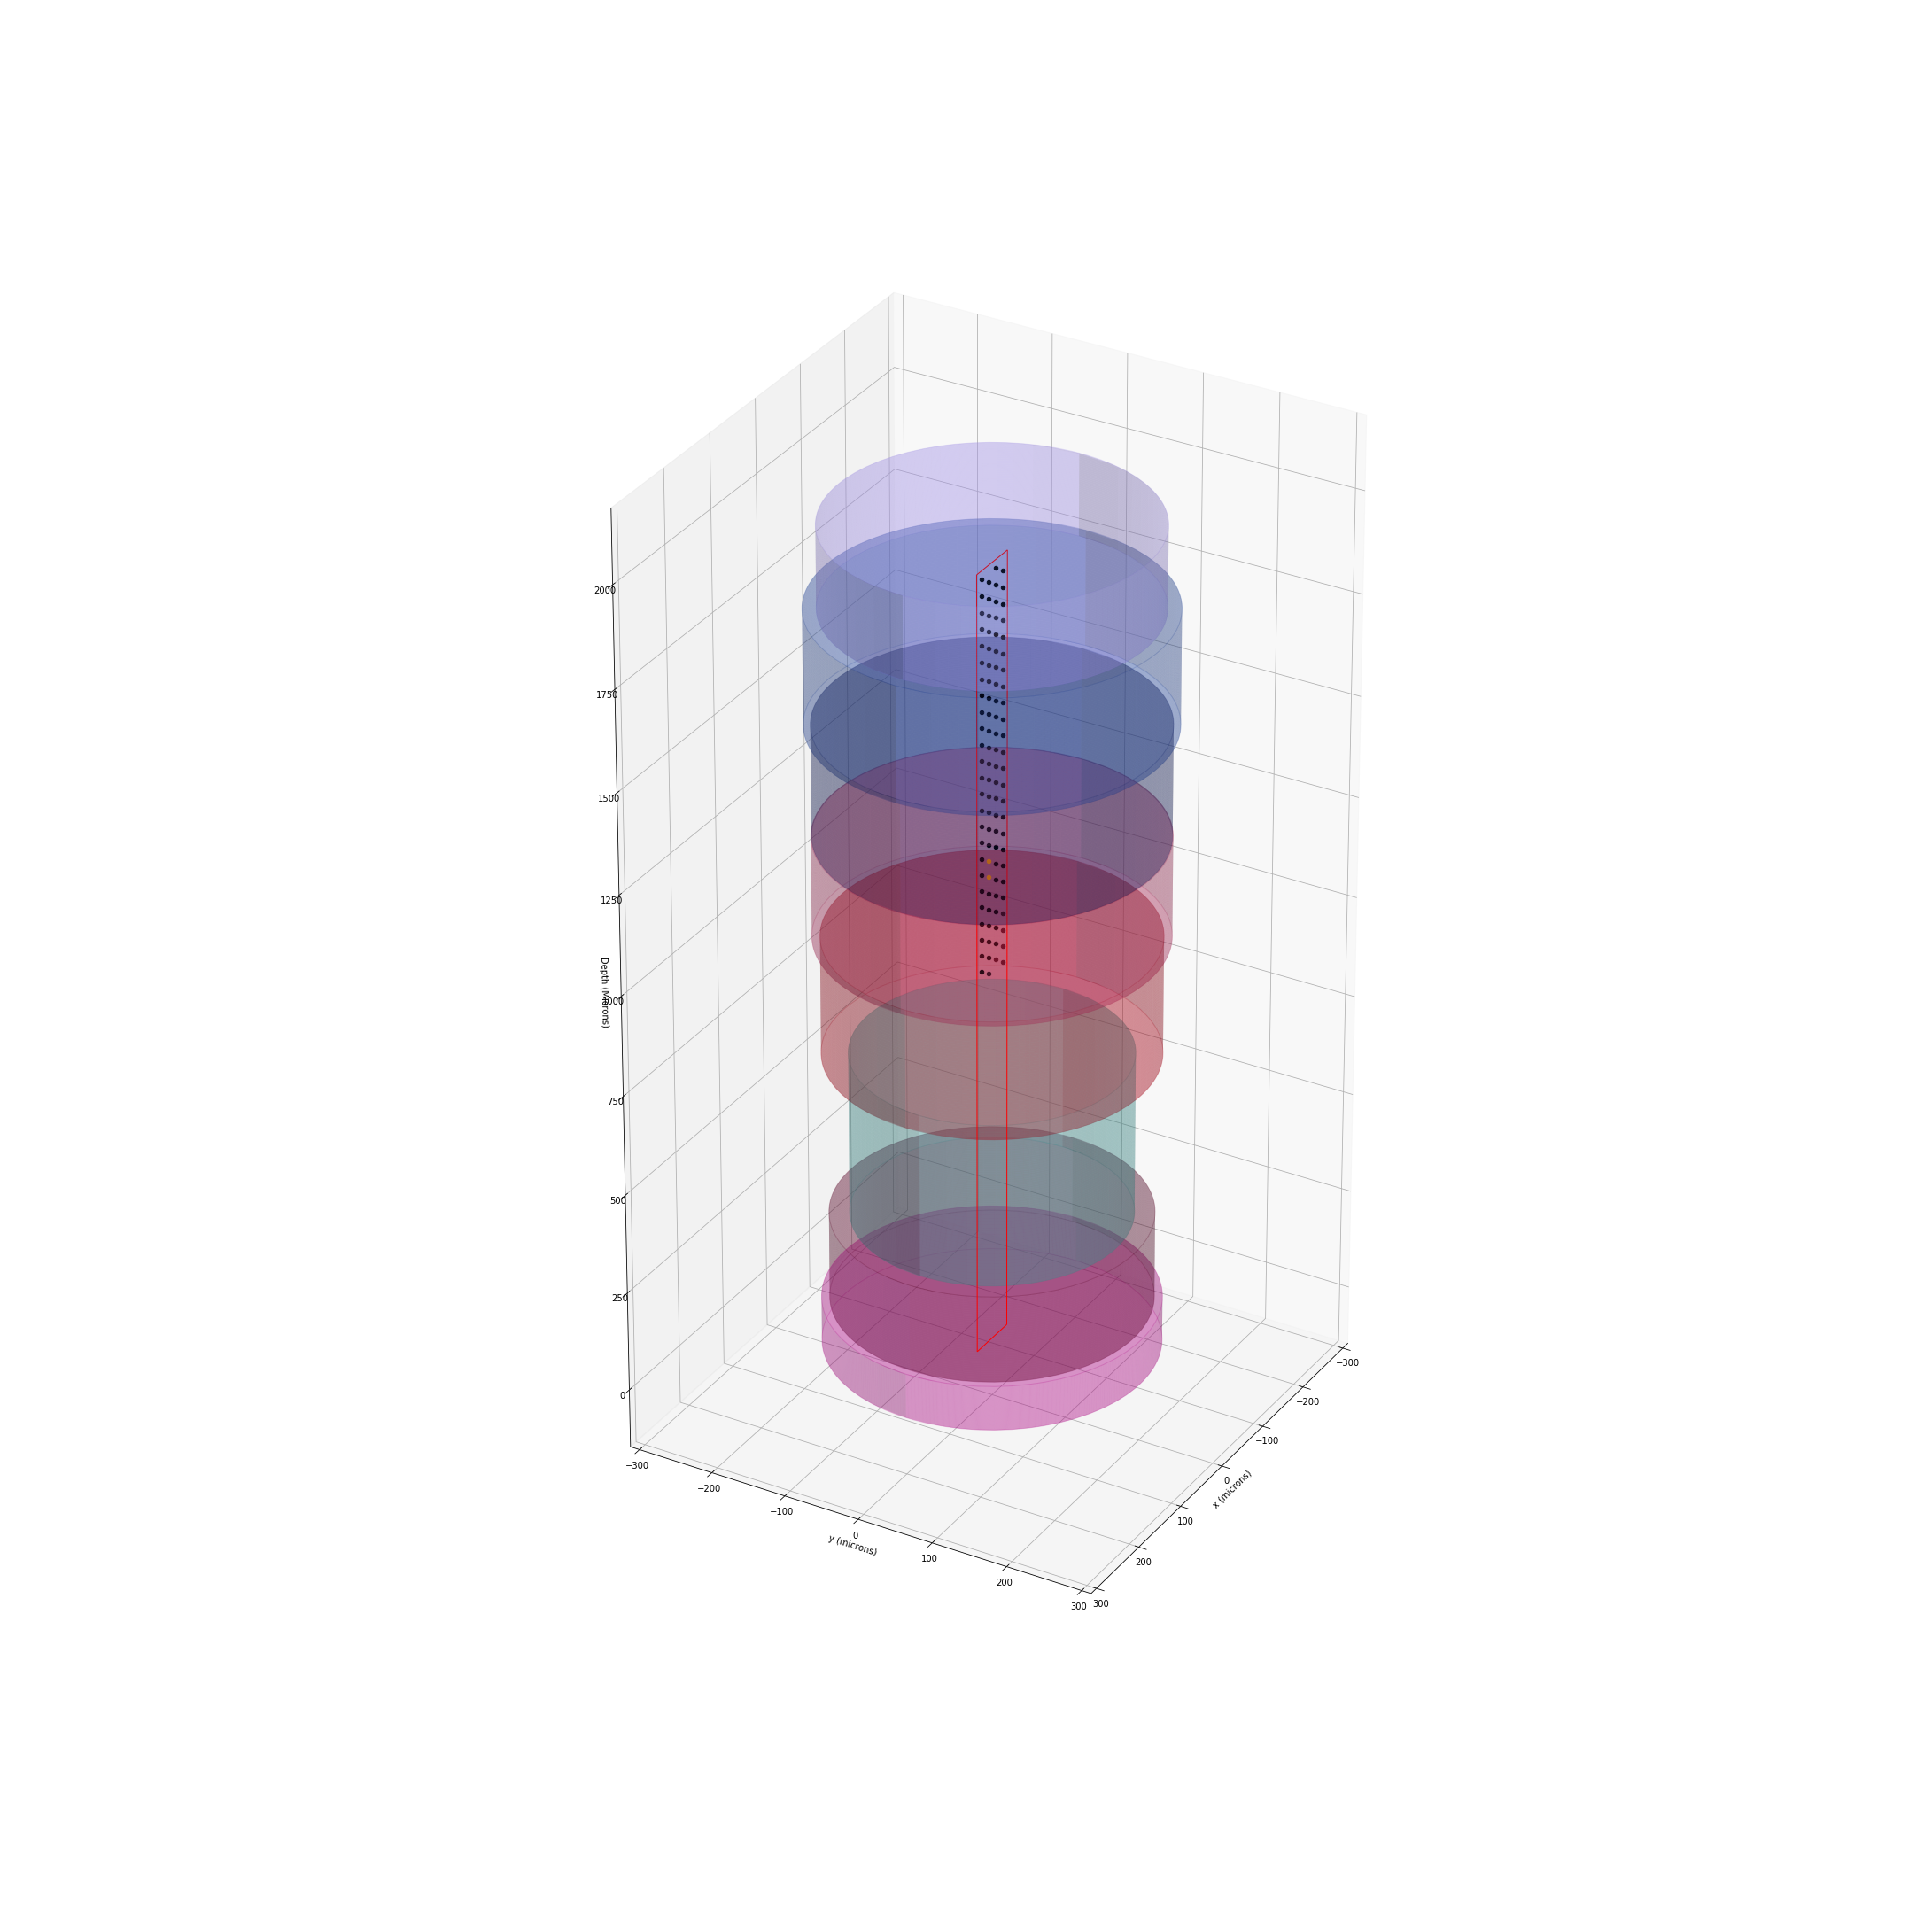

In [9]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#Create a probe object that stores channel information
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('Probe.py'))))
from Probe import NeuroPixel, NeuralProbe
probe = NeuroPixel(num_channels = 192)

#Draw the probe, black channels are recording, orange channels are reference (can exclude channel ids from drawing)
probe.draw(ax=ax, excluded_channel_ids=range(92))

#Plot the layers of the column to see how the probe interacts with the cortical region
column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]


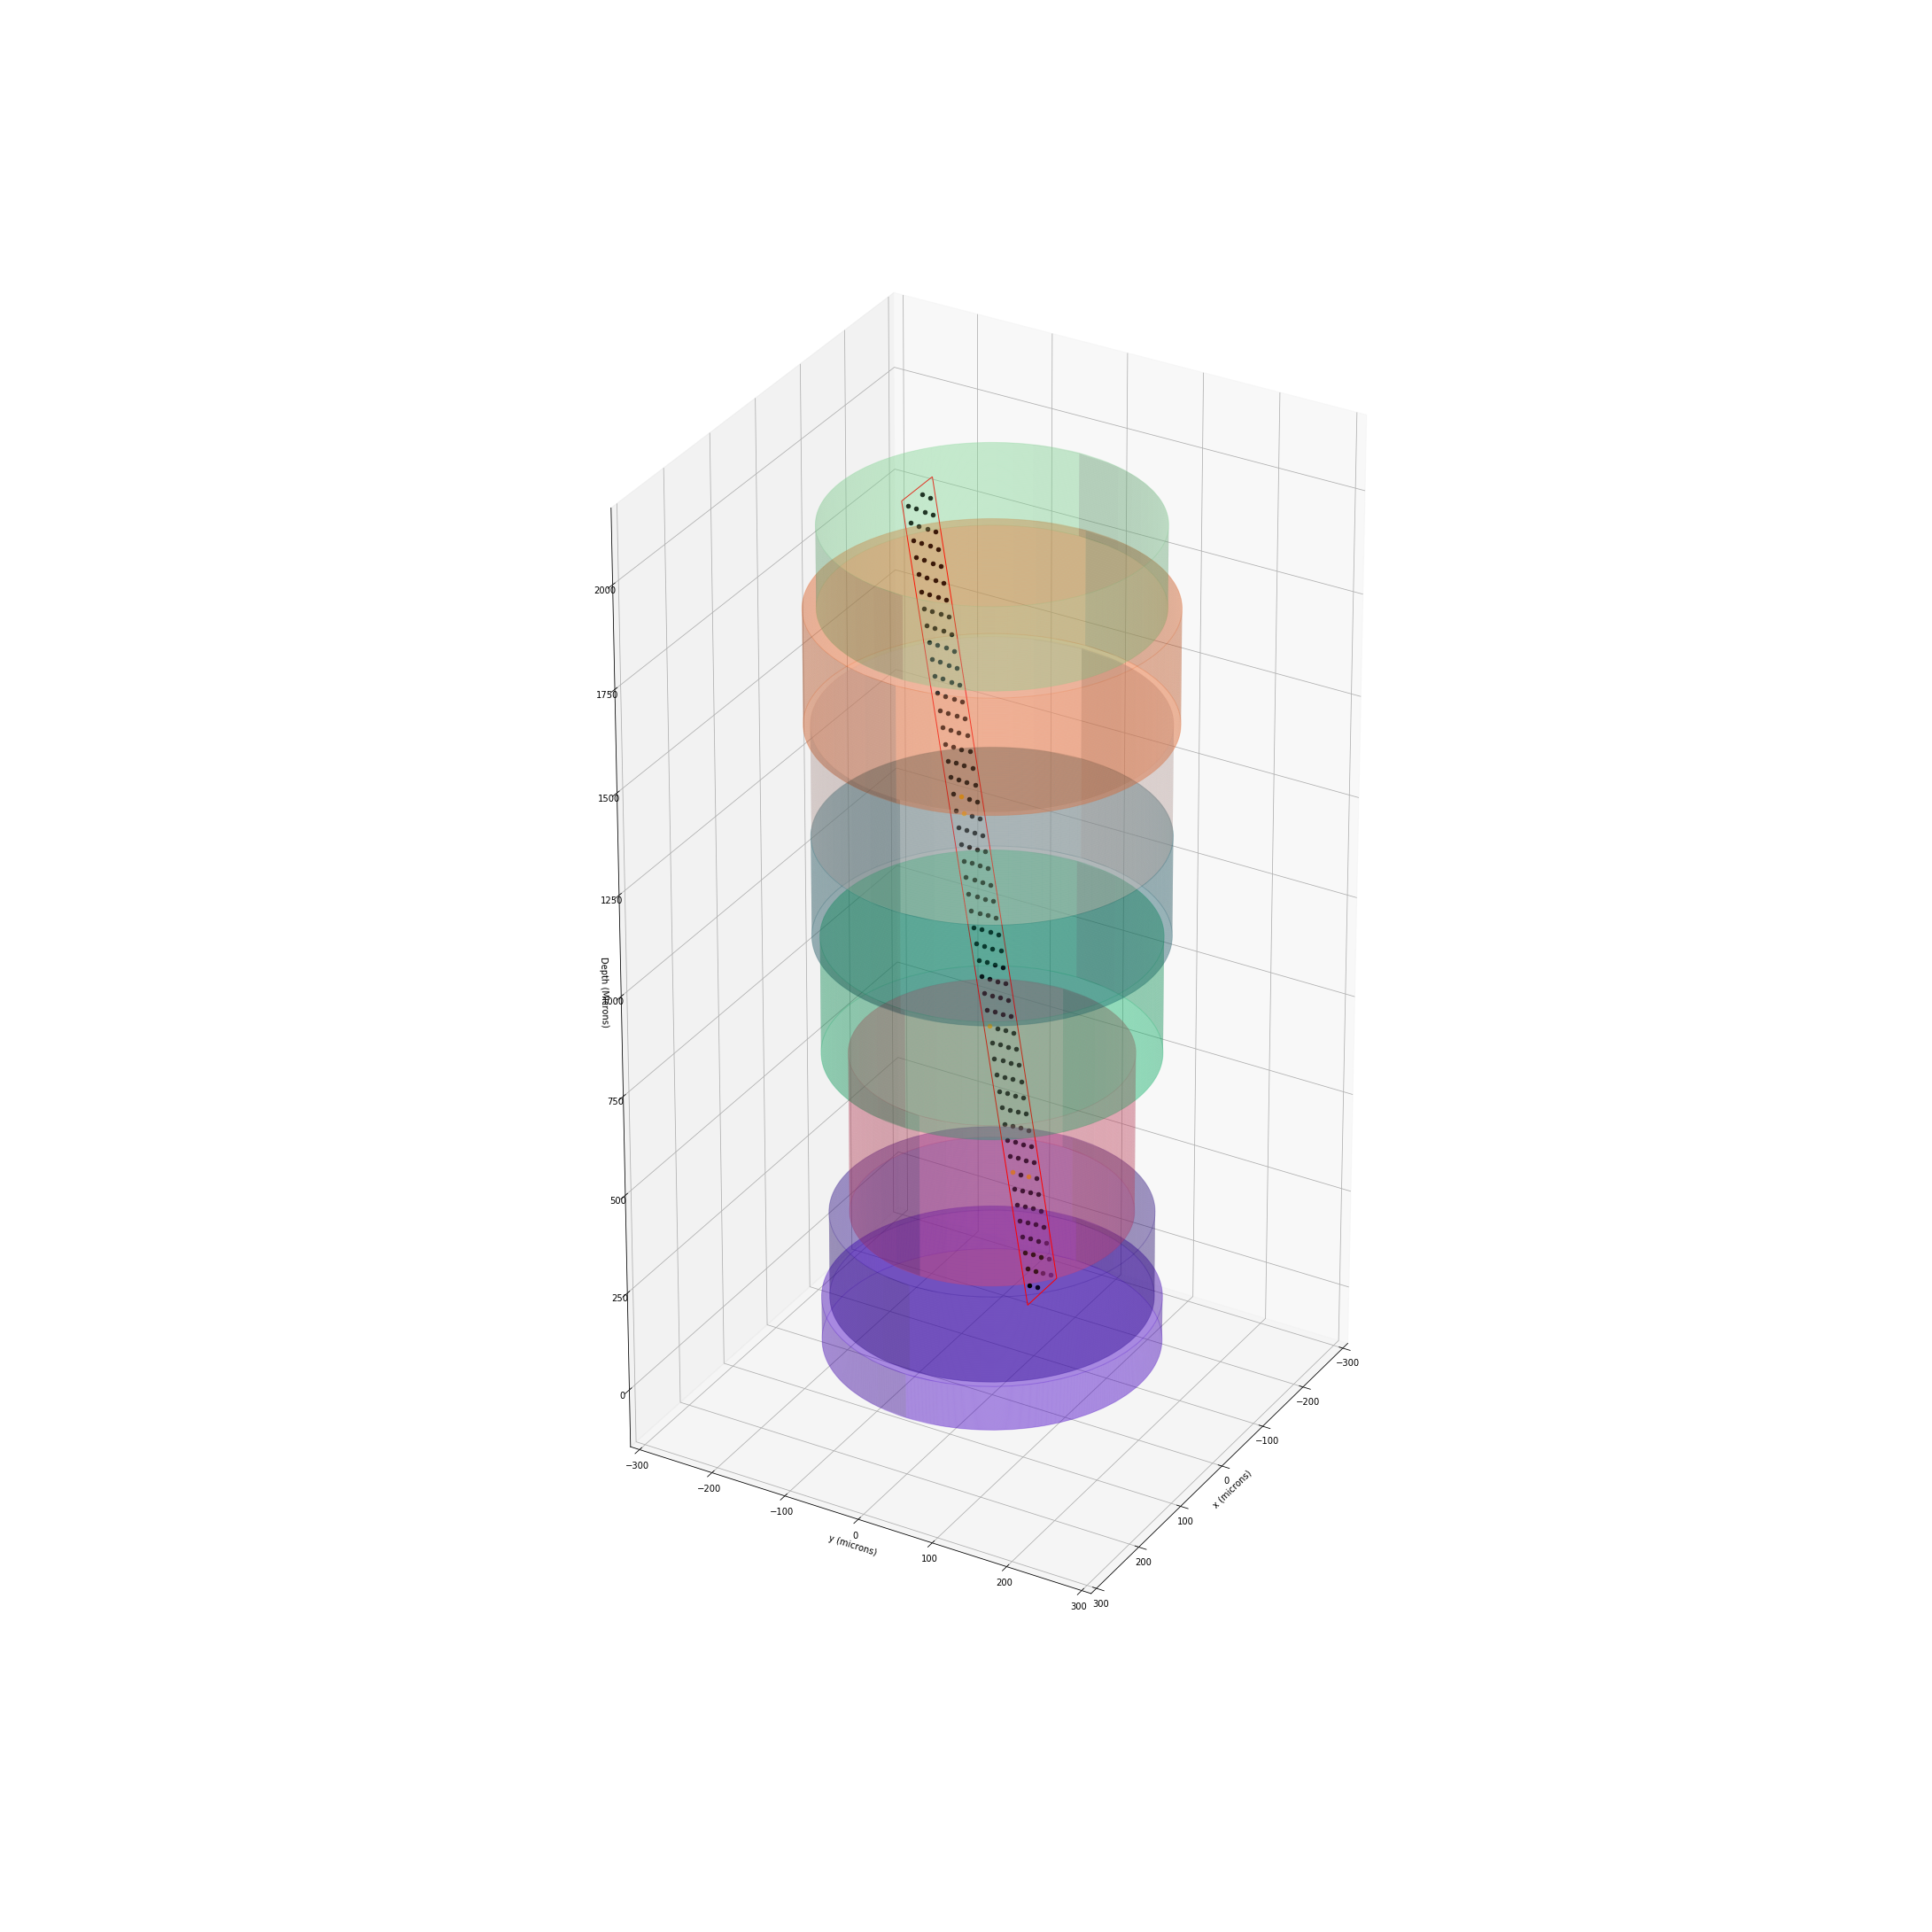

In [10]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#rotate the probe around the given axis counterclockwise with a given angle (radians). Plotting is optional
axis = np.asarray([1, 0, 0])
theta = math.pi/36 #radians
probe.rotate(theta, axis, ax=ax, plot=False)

#shift the probe in the direction of a given axis with a given distance. Plotting is optional
axis = np.asarray([1, 0, 0])
dist = -120 #microns
probe.shift(dist, axis, ax=ax, plot=True)


column.plotColumn(plot_neurons=False, ax=ax)

Num neurons: 1476
Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [201.72334005016893, 192.1115923542481, 167.91237276595814, 199.61418265659364, 209.06052994719468, 208.3148040681305, 216.50536213593296, 200.33876276009667]
Heights: [112.35115980299935, 218.05875718323063, 406.06797829354247, 293.3408775072779, 248.0055022928528, 273.8486427917023, 281.4317202823482, 200.20141468040944]
Total Neurons: {'L6B': 40, 'L5B': 329, 'L5A': 242, 'L4': 388, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 477}
IN Neurons: {'L6B': 3, 'L5B': 58, 'L5A': 28, 'L4': 31, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 51}
EX Neurons: {'L6B': 37, 'L5B': 271, 'L5A': 214, 'L4': 357, 'L2': 0, 'L3': 0, 'L1': 0, 'L6A': 426}


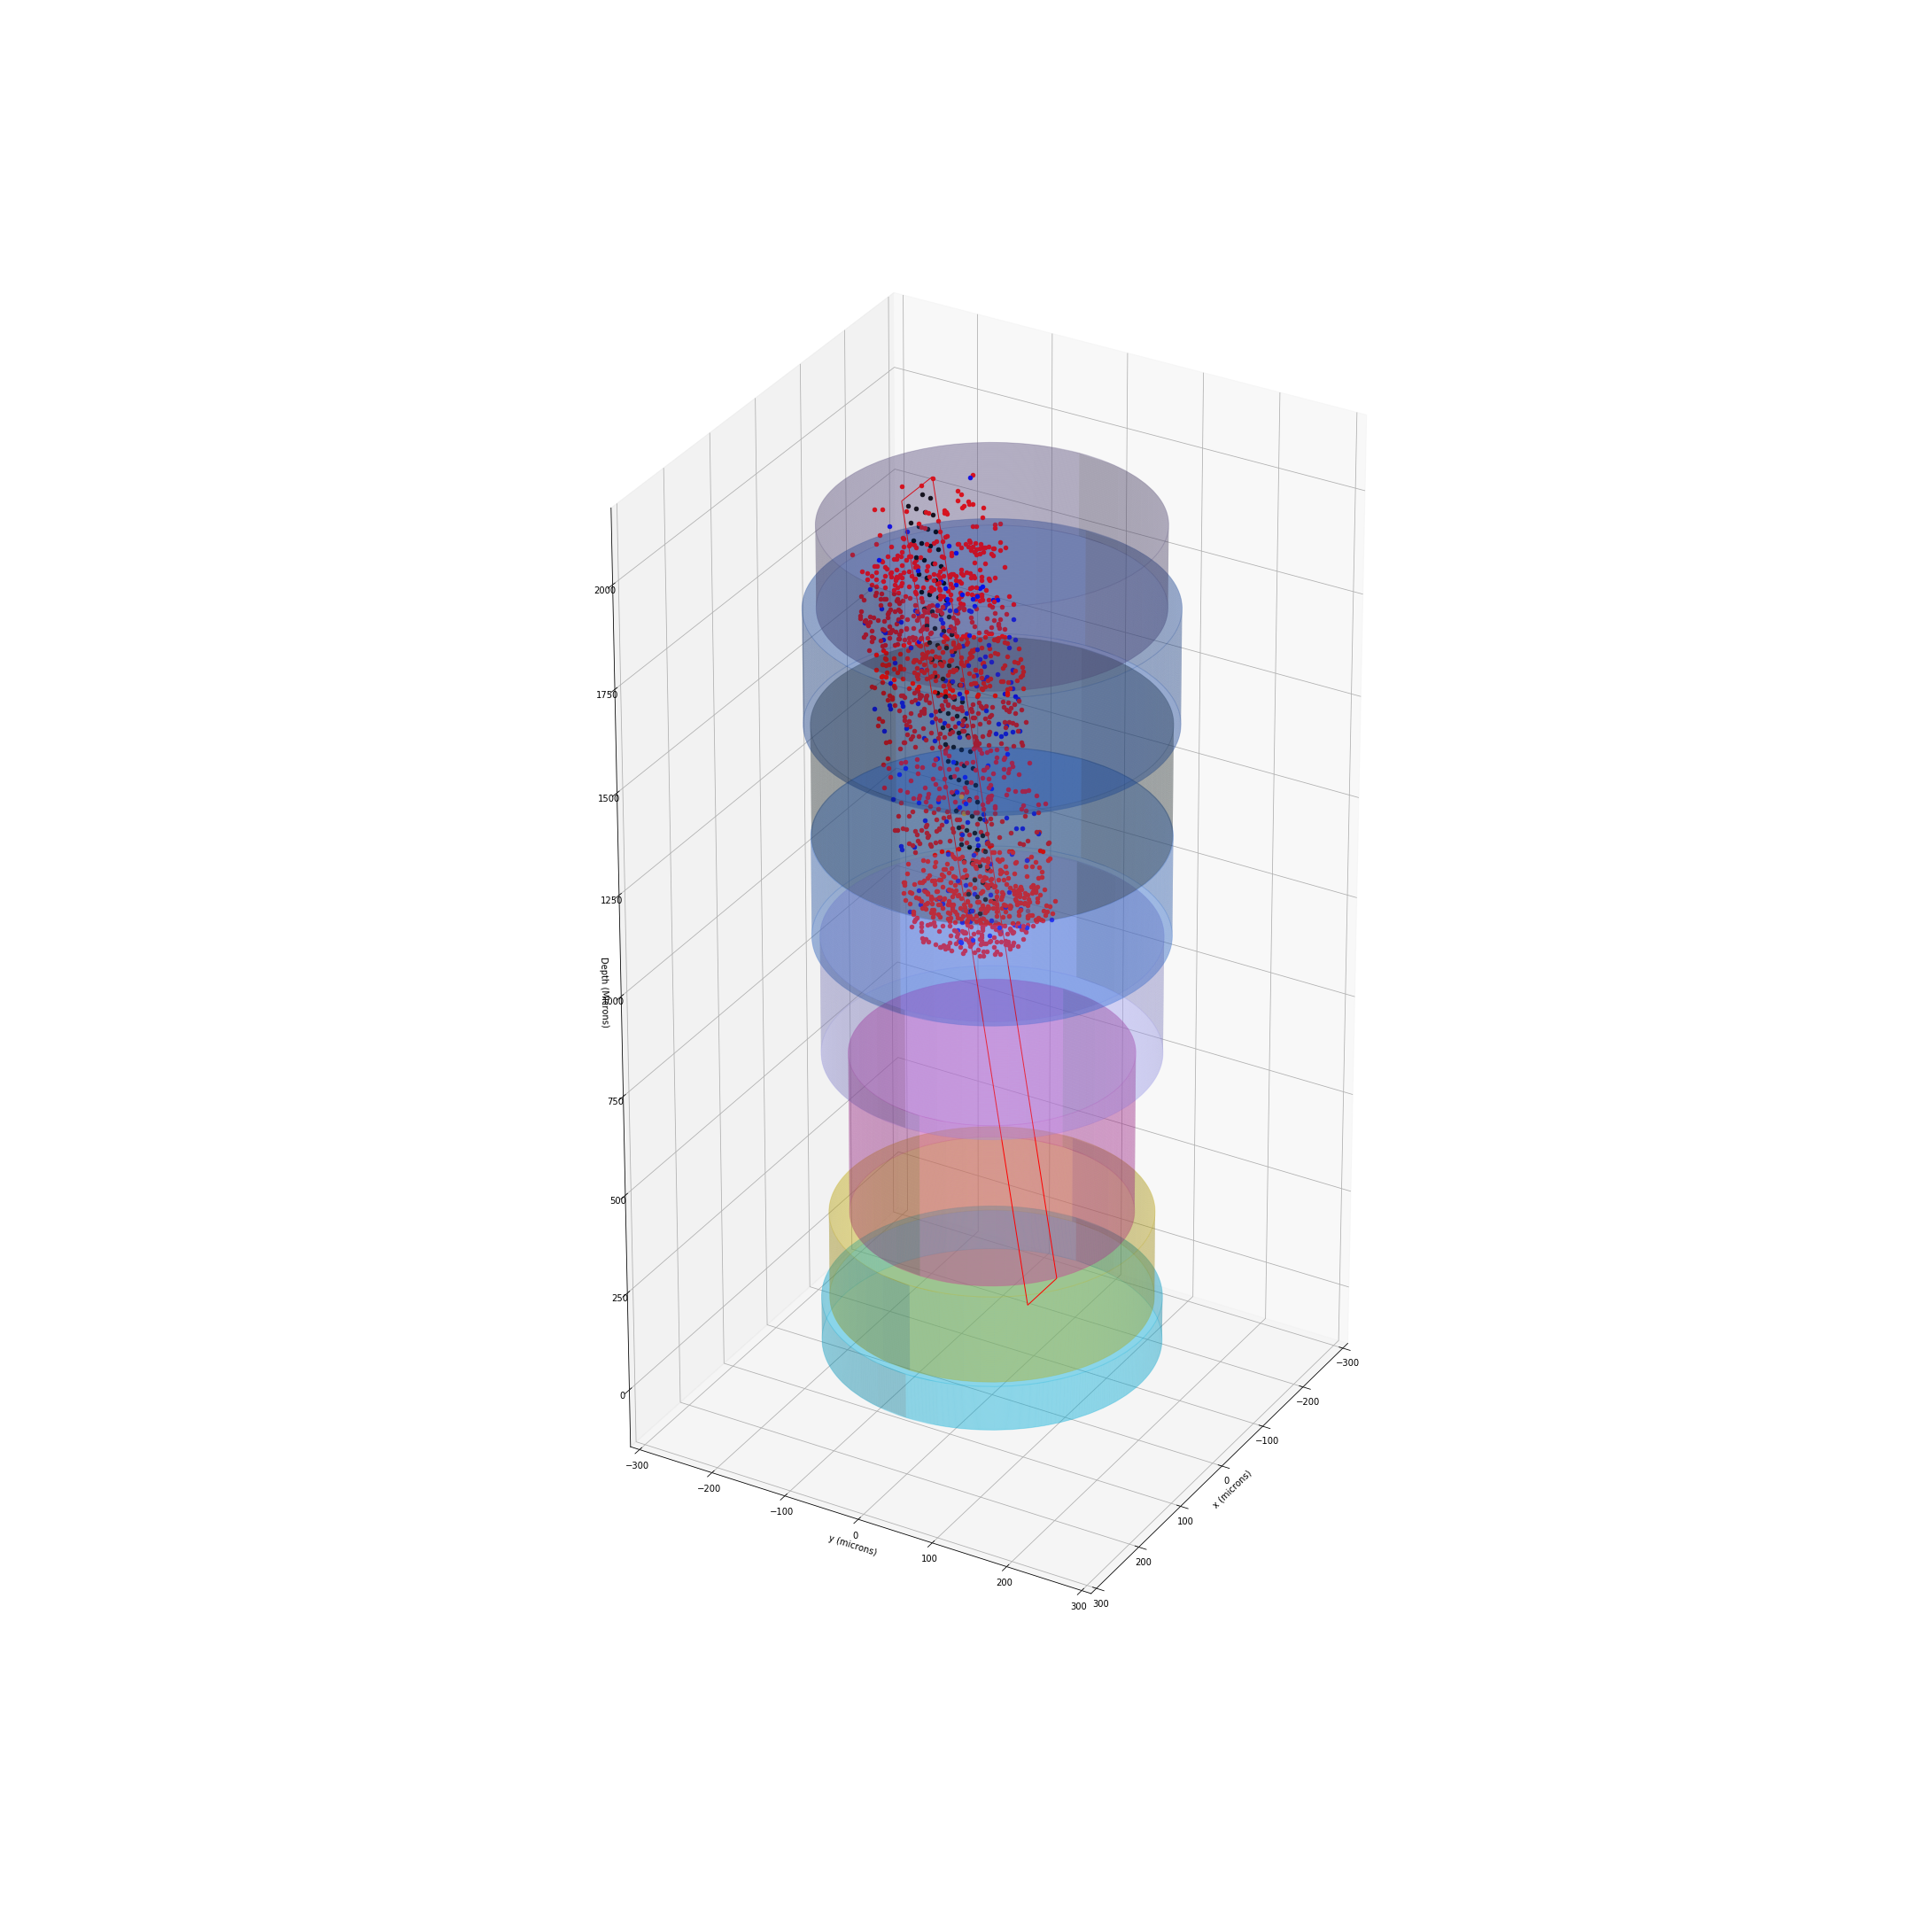

In [11]:
#Get all neurons within a radius of any channel on the array (can exclude channels)
close_neuron_df = probe.getNeuronsRadius(column.getNeurons(), radius=80.0, excluded_channel_ids=range(92))
print("Num neurons: " + str(close_neuron_df.shape[0]))
#Can plot the column with all neurons in the radius
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)
probe.draw(ax, excluded_channel_ids=range(92))

column.plotColumn(close_neuron_df, plot_neurons=True, ax=ax)

## 3. All data structures needed for simulating an extracellular recording

In [12]:
#All neurons for the recording
print(close_neuron_df)

#Can get all neuron positions in numpy array
close_neuron_pos = np.asarray(list(close_neuron_df['pos'].copy()))
print(close_neuron_pos.shape)


#All channels on the probe (you will need to manually exclude channel ids that you excluded earlier)
probe_channels = probe.getChannels()
print(probe_channels)

#Can get all channel positions in numpy array
close_channels_pos = np.asarray(list(probe.getChannels()['pos'].copy()))
print(close_channels_pos.shape)

          id                                              pos type layer
16385  16385  [-151.236286417, -152.460723723, 1568.47481162]   EX   L6A
8202    8202  [-94.4501058477, -83.8618705322, 1024.61804806]   EX    L4
16396  16396  [-67.6433299324, -167.465114357, 1760.09640937]   EX   L6A
16397  16397  [-25.2694256989, -114.337124835, 1606.57910637]   EX   L6A
8213    8213  [-99.9535121069, -37.4555432759, 918.603274735]   EX    L4
8214    8214  [-151.622903352, -76.8986291072, 857.594773105]   EX    L4
16410  16410   [-184.445122623, -100.990831425, 1647.2836942]   EX   L6A
16411  16411  [-41.9481818966, -152.513072545, 1785.59928381]   EX   L6A
16419  16419  [-55.8232483031, -202.475734359, 1650.38404364]   EX   L6A
16421  16421  [-129.857373118, -119.060289192, 1723.59229497]   EX   L6A
16423  16423   [-78.7999998047, -187.459361349, 1558.0736393]   EX   L6A
8235    8235  [-106.943959149, -87.3839553922, 885.898717304]   EX    L4
8236    8236   [-120.215202533, -114.53579681, 990.